# CHAPTER 33 Linear regression


In [1]:
import pandas as pd
data=pd.read_csv("Student_scores.csv")
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


In [4]:
print('columns:',data.columns.tolist())

print('\nDataset Info: ')
print(data.info())
print('\ndataset completeness:') #check missing values
print(data.isnull().sum())
print('\ndataset Consistency:')
print(data.dtypes)

columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

dataset completeness:
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


# Inspect dataset

In [7]:
print('\nDataset Describe:')
print(data.describe())       
#data['hours'].plot(kind='box')


print('\nDataset Time-Keeping:')
print('\nNo timestamps')

print('\nDataset Bias')
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
print(data['class'].value_counts(normalize=True))


Dataset Describe:
           hours      score
count  92.000000  92.000000
mean    6.510870  68.836957
std     2.265336  15.692286
min     2.000000  35.000000
25%     5.000000  57.000000
50%     7.000000  70.000000
75%     8.000000  82.000000
max    11.000000  94.000000

Dataset Time-Keeping:

No timestamps

Dataset Bias
gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64
grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64
class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64


## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_performance_data.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Student / Taniksha Pawar |
| **Last Updated**    | 2025-12-19 |

In [94]:
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

# Encode class column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["class_encoded"] = le.fit_transform(data["grades"])

X = data[["hours"]]
y = data["score"]

Categorical Features: ['name', 'gender', 'grades', 'class']
Numerical Features: ['hours', 'score']


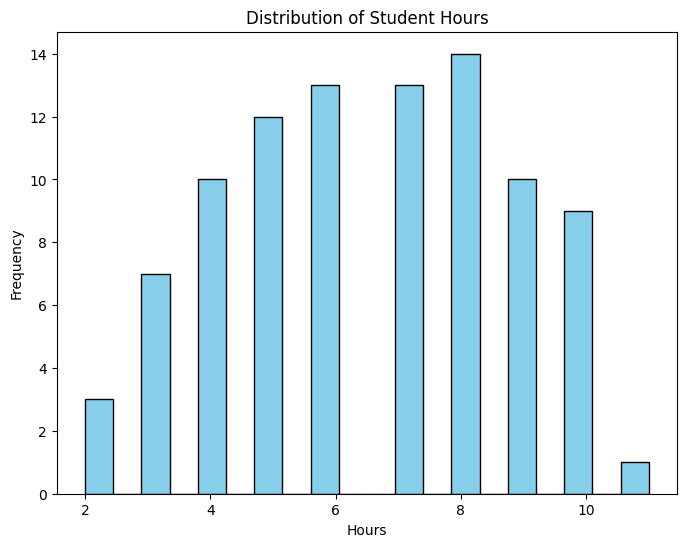

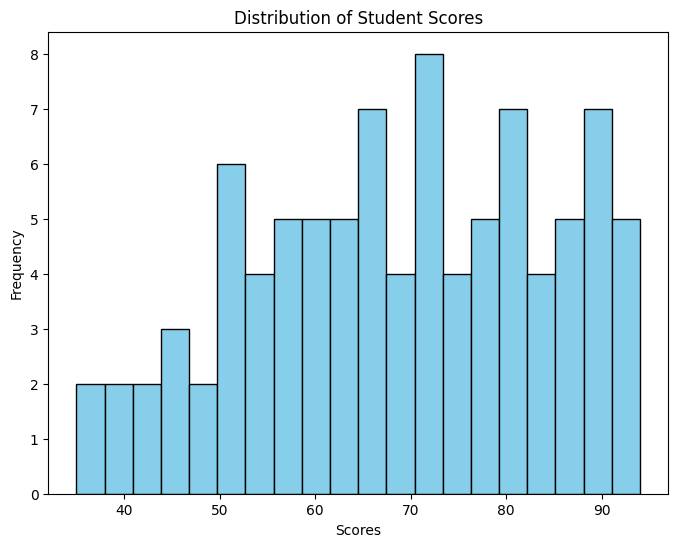

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Student Hours')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Student Scores')
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    #stratify=y
)

In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Coefficient (Slope): 6.804392044598464
Model Intercept: 24.617635980111494


In [98]:
y_pred = model.predict(X_test)
pred_data = {'Y_prediction': y_pred.round(2),
             'Y_test': y_test.reset_index(drop=True)}
prediction_table = pd.DataFrame(pred_data)
prediction_table

,Y_prediction,Y_test
0,79.05,81
1,85.86,84
2,45.03,40
3,38.23,36
4,79.05,76
5,79.05,82
6,72.25,75
7,85.86,85
8,58.64,60
9,45.03,43


In [100]:
new_input=pd.DataFrame([[1]],columns=['hours'])
print(model.predict(new_input))

[31.42202802]


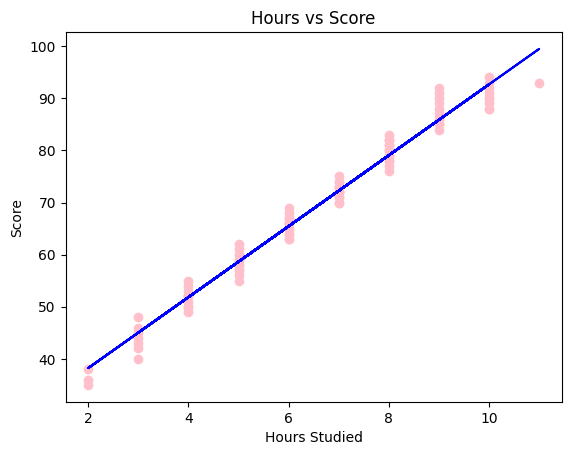

In [67]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='pink')
plt.plot(X, model.predict(X), color='blue')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


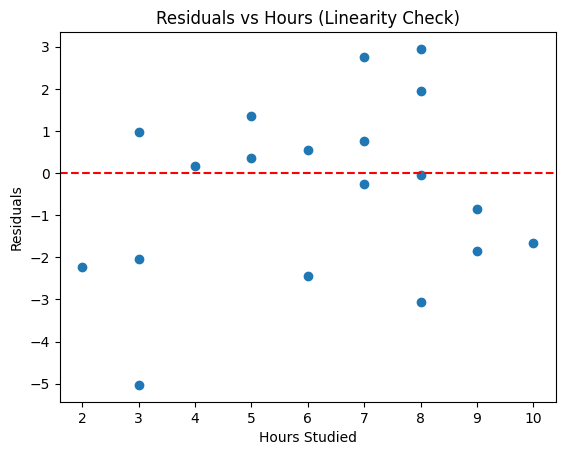

In [68]:
residuals = y_test - y_pred

# 1. Linearity check (Residuals vs X)
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MSE  : 4.24
RMSE : 2.06
R²   : 0.984


# Activity


    "Hours": [1, 2, 3, 4, 5, 6, 7, 8], 

    "Score": [35, 42, 51, 60, 68, 77, 85, 90]

In [70]:
new_data={
    
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8], 

    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
}
df=pd.DataFrame(new_data)
print(df)
    

   Hours  Score
0      1     35
1      2     42
2      3     51
3      4     60
4      5     68
5      6     77
6      7     85
7      8     90


In [81]:
x_new = df[["Hours"]]
y_new = df["Score"]

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_new,
    y_new,
    test_size=0.2,
    random_state=42
   
)

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train) 
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Coefficient (Slope): 8.03
Model Intercept: 27.359999999999992


In [84]:
y_pred = model.predict(x_test)
pred_data = {'y_prediction': y_pred.round(2),
             'y_test': y_test.reset_index(drop=True)}
prediction_table = pd.DataFrame(pred_data)
prediction_table

,y_prediction,y_test
0,43.42,42
1,75.54,77


In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MSE  : 2.07
RMSE : 1.44
R²   : 0.993


In [93]:
new_input=pd.DataFrame([[1]],columns=['Hours'])
print(model.predict(new_input))


[35.39]


In [ ]:
y_pred = model.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(x_new, y_new, color='blue', label="Actual")
plt.plot(x_new, y_pred, color='red', label="Predicted Line")
plt.title("Hours vs Score (Linear Regression)")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.legend()
plt.grid(alpha=0.3)
plt.show()